In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random, itertools

In [2]:
class Perceptron:
    'A simple Perceptron implementation.'
    def __init__(self, weights, bias, alpha=0.1):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
    
    def propagate(self, x):
        return self.activation(self.net(x)) 
        
    def activation(self, net):
        if net > 0:
            return 1
        return 0
    
    def net(self, x):
        return np.dot(self.weights, x) + self.bias
    
    def learn(self, x, y):
        y_hat = self.propagate(x)
        self.weights = [w_i + self.alpha*x_i*(y-y_hat) for (w_i, x_i) in zip(self.weights, x)]
        self.bias = self.bias + self.alpha*(y-y_hat)
        return np.abs(y_hat - y)

In [3]:
size = 50 # size of data set

In [4]:
data = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=np.random.uniform(size=(size,2)))

In [5]:
data.head(10)

,$x_1$,$x_2$
0,0.688074,0.954832
1,0.888278,0.834271
2,0.795737,0.597430
3,0.429137,0.828191
4,0.751640,0.523515
5,0.168487,0.052590
6,0.709676,0.266735
7,0.840034,0.097519
8,0.197928,0.963927
9,0.997587,0.793648


In [6]:
def condition(x):
    return int(np.sum(x) > 1)

In [7]:
data['y'] = data.apply(condition, axis=1)

In [8]:
data.head(10)

,$x_1$,$x_2$,y
0,0.688074,0.954832,1
1,0.888278,0.834271,1
2,0.795737,0.597430,1
3,0.429137,0.828191,1
4,0.751640,0.523515,1
5,0.168487,0.052590,0
6,0.709676,0.266735,0
7,0.840034,0.097519,0
8,0.197928,0.963927,1
9,0.997587,0.793648,1


In [9]:
def plot_data(data, ax):
    data[data.y==1].plot(kind='scatter', 
                         x='$x_1$', y='$x_2$', 
                         color='Red', ax=ax)
    data[data.y==0].plot(kind='scatter', 
                         x='$x_1$', y='$x_2$', 
                         color='Gray', ax=ax)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

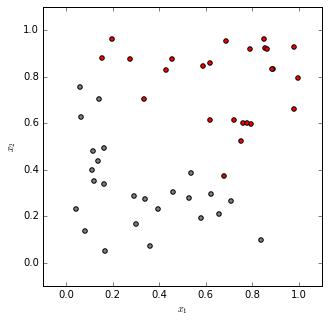

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plot_data(data, ax)

In [3]:
def learn_data(perceptron, data):
    'Returns the number of errors made.'
    count = 0 
    for i, row in data.iterrows():
        count += perceptron.learn(row[0:2], row[2])
    return count

In [4]:
def threshold(perceptron, x_1):
    return (-perceptron.weights[0] * x_1 - perceptron.bias) / perceptron.weights[1]

In [5]:
def plot_perceptron_threshold(perceptron, ax):
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    
    x2s = [threshold(perceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2s)
    
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

In [6]:
def plot_all(perceptron, data, t, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
    plot_data(data, ax)
    plot_perceptron_threshold(perceptron, ax)
    
    ax.set_title('$t='+str(t+1)+'$')

In [7]:
def calc_error(perceptron, data):
    X = data[['$x_1$', '$x_2$']].values
    y = data.y
    preds = [perceptron.propagate(X[i]) for i in range(X.shape[0])]
    err = sum([int(preds[i] != y[i]) for i in range(X.shape[0])])
    return err / X.shape[0]

In [16]:
perceptron = Perceptron([0.1,-0.1],0.1)

0

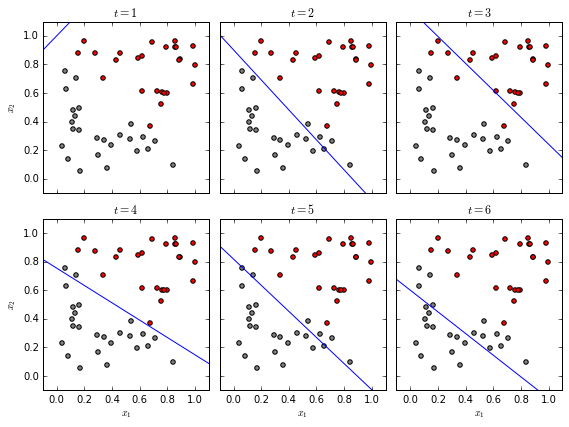

In [17]:
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))
errors=[]
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
errors=(calc_error(perceptron, data))
f.tight_layout()
errors

1. Perceptron 
(a)

In [18]:
def avg_weight(perceptron,t,sum_weight,sum_bias):
    sum_weight=np.add(sum_weight,perceptron.weights)
    avg_weight=np.divide(sum_weight,(t+1))
    sum_bias=np.add(sum_bias,perceptron.bias)
    avg_bias=np.divide(sum_bias,(t+1))
    print avg_weight
    return sum_weight, sum_bias, avg_weight, avg_bias

In [19]:
#sum_weight=[0.1,-0.1]
#sum_bias=[0.1]
perceptron = Perceptron([0.1,-0.1],0.1)

[ 0.1 -0.1]
[ 0.1 -0.1]
[ 0.1 -0.1]
[ 0.1082587   0.00544767]
[ 0.21651739  0.01089535]
[ 0.1082587   0.00544767]
[ 0.10204762  0.04104161]
[ 0.30614287  0.12312483]
[ 0.10204762  0.04104161]
[ 0.10881498  0.06632971]
[ 0.43525993  0.26531882]
[ 0.10881498  0.06632971]
[ 0.11624857  0.08891625]
[ 0.58124284  0.44458126]
[ 0.11624857  0.08891625]
[ 0.12244322  0.10773838]
[ 0.73465933  0.64643025]
[ 0.12244322  0.10773838]


0

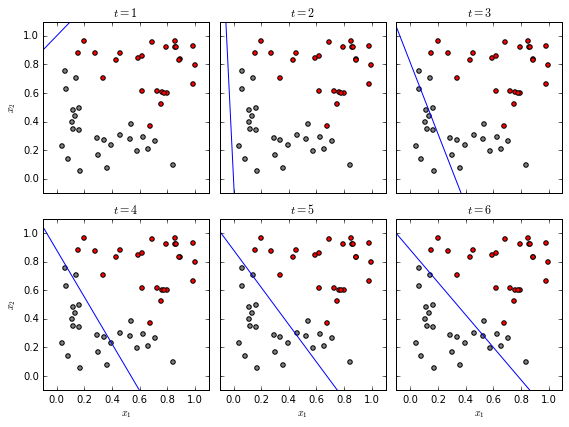

In [20]:
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))
avg_errors=[]
sum_weight=[0,0]
sum_bias=[0]
for t in range(6):
    sum_weight,sum_bias,weights,bias = avg_weight(perceptron,t,sum_weight,sum_bias)
    perceptron=Perceptron(weights,bias)
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    print(sum_weight)
    print(weights)
avg_errors=(calc_error(perceptron, data))
f.tight_layout()
avg_errors

It seems that averaging weight vactor in each step cannot improve the performance.

(b)

In [165]:
def weighted_avg(perceptron,t,weighted_sum_weight,weighted_sum_bias):
    sum_t=sum(i for i in range(t+2))
    t_weight=np.multiply((t+1),perceptron.weights)
    t_bias=np.multiply((t+1),perceptron.bias)
    weighted_sum_weight=np.add(weighted_sum_weight,t_weight)    
    weighted_avg_weight=np.divide(weighted_sum_weight,sum_t)
    weighted_sum_bias=np.add(weighted_sum_bias,t_bias)
    weighted_avg_bias=np.divide(weighted_sum_bias,sum_t)
    return weighted_sum_weight, weighted_sum_bias, weighted_avg_weight, weighted_avg_bias

In [166]:
#weighted_sum_weight=[0.1,-0.1]
#weighted_sum_bias=[0.1]
perceptron = Perceptron([0.1,-0.1],0.1)

0.26

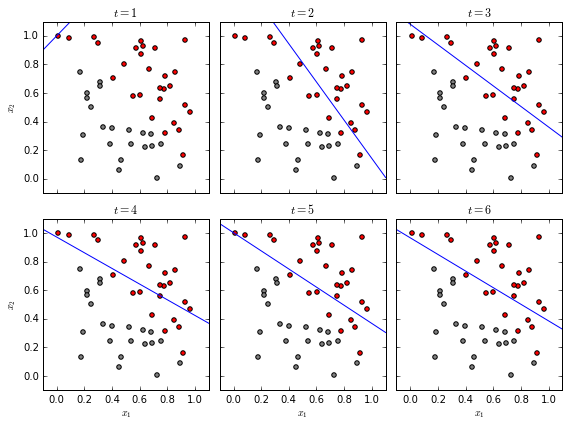

In [167]:
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))
weighted_avg_errors=[]
weighted_sum_weight=[0,0]
weighted_sum_bias=[0]
for t in range(6):
    weighted_sum_weight,weighted_sum_bias,weights,bias = weighted_avg(perceptron,t,weighted_sum_weight,weighted_sum_bias)
    perceptron=Perceptron(weights,bias)
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)

weighted_avg_errors=(calc_error(perceptron, data))
f.tight_layout()
weighted_avg_errors

Using a weighted average, where the weight is proportional to the time step, chould improve performance.

(c)

In [8]:
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Perceptron as pcp

In [9]:
X, Y = make_classification(n_samples=1000,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
data_train = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=X[500:])
#data_train['y']=Y[500:]
data_test = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=X[:500])
#data_test['y']=Y[:500]

data_train.head(10)

,$x_1$,$x_2$
0,0.926595,2.978774
1,1.351538,0.410215
2,0.859901,-1.091876
3,1.773357,-0.406913
4,0.754439,0.746602
5,0.490716,-0.296181
6,0.568348,1.381642
7,1.977871,-0.938779
8,0.340065,-1.144633
9,0.941712,0.092599


In [10]:
def evaluate(perceptron,data_test):
    X = data_test[['$x_1$', '$x_2$']].values
    y = data_test.y
    preds = [perceptron.propagate(X[i]) for i in range(X.shape[0])]
    err = sum([int(preds[i] != y[i]) for i in range(X.shape[0])])
    return err / X.shape[0]

In [11]:
perceptron = Perceptron([0.1,-0.1],0.1)
errors=[]
for t in range(10):
    weights,bias=perceptron.weights,perceptron.bias
    learn_data(perceptron, data_train)
model=Perceptron(weights,bias)
print(evaluate(model,data_test))

IndexError: index out of bounds

In [257]:
perceptron = Perceptron([0.1,-0.1],0.1)
avg_errors=[]
sum_weight=[0,0]
sum_bias=[0]
for t in range(10):
    sum_weight,sum_bias,weights,bias = avg_weight(perceptron,t,sum_weight,sum_bias)
    perceptron=Perceptron(weights,bias)
    learn_data(perceptron, data)
model_avg=Perceptron(weights,bias)
print(evaluate(model_avg,data_test))

0.158


In [256]:
perceptron = Perceptron([0.1,-0.1],0.1)
weighted_avg_errors=[]
weighted_sum_weight=[0,0]
weighted_sum_bias=[0]
for t in range(10):
    weighted_sum_weight,weighted_sum_bias,weights,bias = weighted_avg(perceptron,t,weighted_sum_weight,weighted_sum_bias)
    perceptron=Perceptron(weights,bias)
    learn_data(perceptron, data)
model_weighted_avg=Perceptron(weights,bias)
print(evaluate(model_weighted_avg,data_test))

0.154


I evaluated the performance of these three models, using the same test dataset. The vanilla model has the highest error rate (0.202), the averaged weight model's error rate was 0.158, and the weighted average model was 0.154, which is the lowest.

2 Naive Bayes
(a). p(c)=1/2, p(¯c)=1/2
     p(circle|c)=(1+1)/(11+3)=1/7
     p(square|c)=(8+1)/(11+3)=9/14
     p(triangle|c)=(2+1)/(11+3)=3/14
     p(circle|¯c)=(1+1)/(10+3)=2/13
     p(square|¯c)=(2+1)/(10+3)=3/13
     p(triangle|¯c)=(7+1)/(10+3)=8/13


(b). p(c|?)∝1/2·1/7·(9/14)^3·3/14≈0.00407
     p(¯c|?)∝1/2·2/13·(3/13)^3·8/13≈0.00058
     So, I think the unlabeled example is most likely to be the class 1.

3 Logistic Regression in sklearn
(a).

In [1]:
import sklearn
from sklearn import linear_model
from sklearn.datasets import load_files
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score

In [2]:
dataset = load_files("movie-reviews/")
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [3]:
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

In [4]:
vectorizer = CountVectorizer(stop_words="english")
# fit the vectorizer to the training documents
X_train = vectorizer.fit_transform(docs_train)

In [5]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)
X_test = vectorizer.transform(docs_test)
y_hat = model_NB.predict(X_test)
print("accuracy is: ", metrics.accuracy_score(y_test, y_hat))

('accuracy is: ', 0.80400000000000005)


In [6]:
model_LR=sklearn.linear_model.LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
X_test = vectorizer.transform(docs_test)
y_hat = model_LR.predict(X_test)

In [8]:
print("accuracy is: ", model_LR.score(X_test, y_test))

('accuracy is: ', 0.84599999999999997)


In [9]:
print("classification report: ", metrics.classification_report(y_test, y_hat))

('classification report: ', '             precision    recall  f1-score   support\n\n          0       0.89      0.82      0.85       271\n          1       0.80      0.88      0.84       229\n\navg / total       0.85      0.85      0.85       500\n')


Compared to Naive Bayes, which has a precision of 0.78, Logistic Regression is better at predictive performance, with a precision of 0.81.

(b).

(c).

In [10]:
scores_NB = sklearn.cross_validation.cross_val_score(model_NB,X_test, y_test,cv=10)
scores_LR = sklearn.cross_validation.cross_val_score(model_LR,X_test, y_test,cv=10)

In [11]:
scores=(scores_NB,scores_LR)

{'boxes': [<matplotlib.lines.Line2D at 0x1055f3be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1055f8f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x105605eb8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x110e83a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1055f3da0>,
  <matplotlib.lines.Line2D at 0x105610748>]}

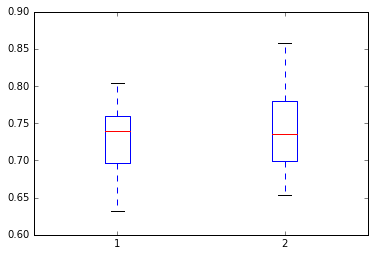

In [305]:
plt.boxplot(scores)